In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
csv_path = '../../data/clean_insurance.csv'
df = pd.read_csv(csv_path)

In [7]:
df.info

<bound method DataFrame.info of       age     bmi  children      charges  sex_male  smoker_yes  \
0      19  27.900         0  16884.92400     False        True   
1      18  33.770         1   1725.55230      True       False   
2      28  33.000         3   4449.46200      True       False   
3      33  22.705         0  21984.47061      True       False   
4      32  28.880         0   3866.85520      True       False   
...   ...     ...       ...          ...       ...         ...   
1188   50  30.970         3  10600.54830      True       False   
1189   18  31.920         0   2205.98080     False       False   
1190   18  36.850         0   1629.83350     False       False   
1191   21  25.800         0   2007.94500     False       False   
1192   61  29.070         0  29141.36030     False        True   

      region_northwest  region_southeast  region_southwest  
0                False             False              True  
1                False              True             

In [10]:
df.isnull().sum()

age                 0
bmi                 0
children            0
charges             0
sex_male            0
smoker_yes          0
region_northwest    0
region_southeast    0
region_southwest    0
dtype: int64

✅Confirms: No Missing Values and Correct Dtypes

In [15]:
num_cols = ['age', 'bmi', 'children', 'charges']

Distribution Histogram -> To verify smooth shapes and confirm outliers are gone.

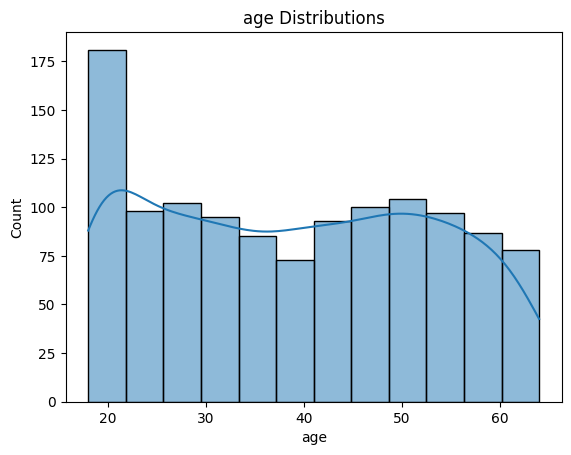

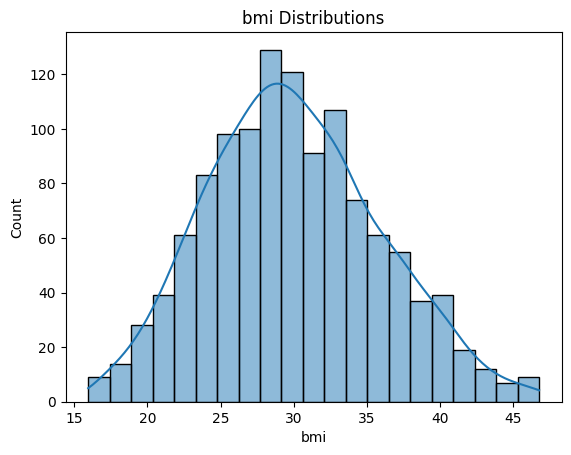

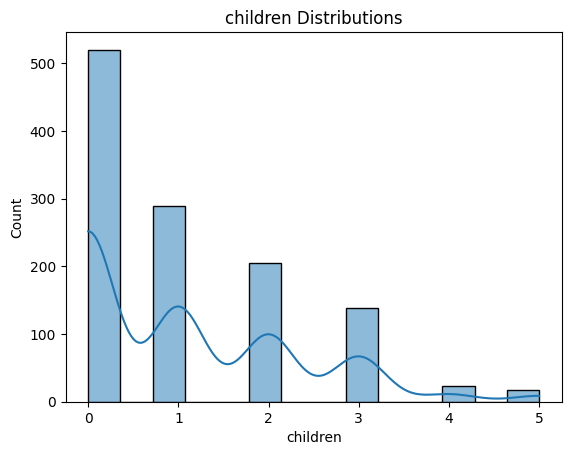

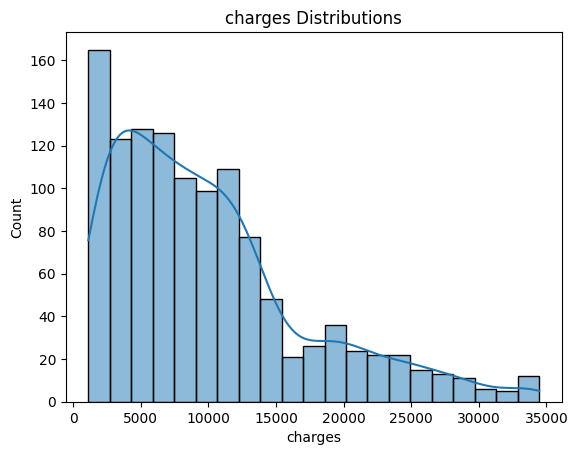

In [16]:
#Distributions
for col in num_cols:
    sns.histplot(df[col], kde=True)
    plt.title(f'{col} Distributions')
    plt.show()

Boxplot Outlier Check -> Visually confirm no extreme points left.

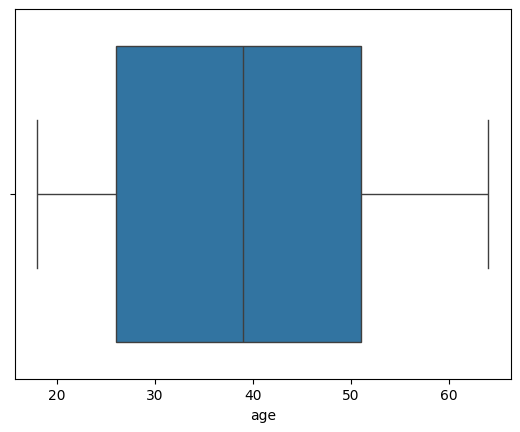

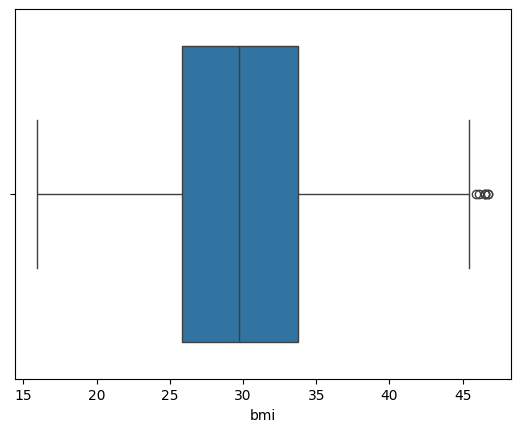

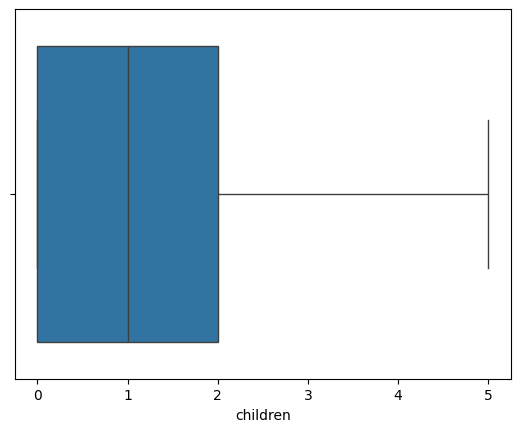

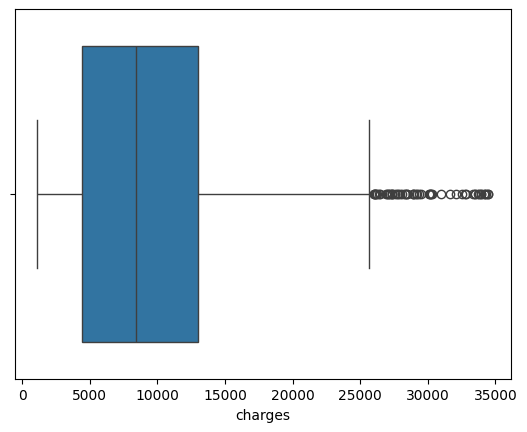

In [19]:
#Boxplot Outlier Check
for col in num_cols:
    sns.boxplot(x=df[col])
    plt.show()

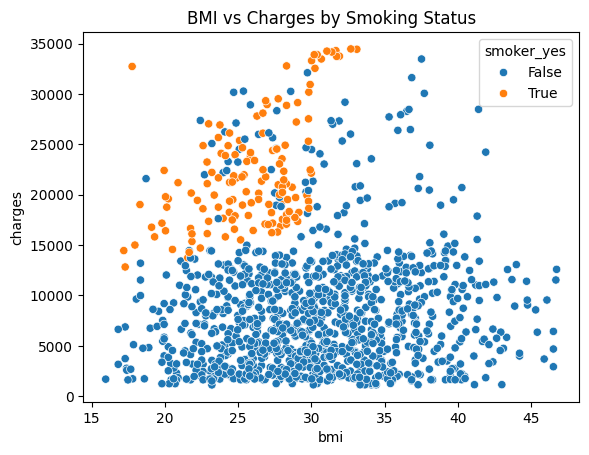

In [ ]:
#BMI vs Charges (Smoking Status)
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker_yes')
plt.title('BMI vs Charges by Smoking Status')
plt.show()

✅Scatterplot: To detect linear/non-linear trends and outliers effects.

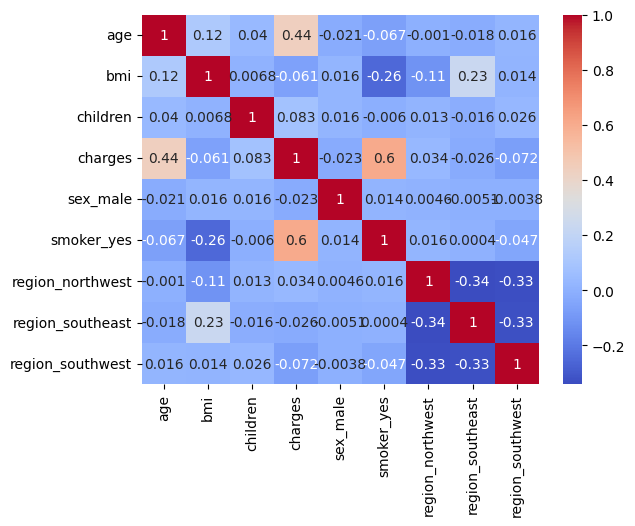

In [5]:
#Correlation Heatmap
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap = 'coolwarm')
plt.show()

✅Correlation: To understand strongest variable relationships.

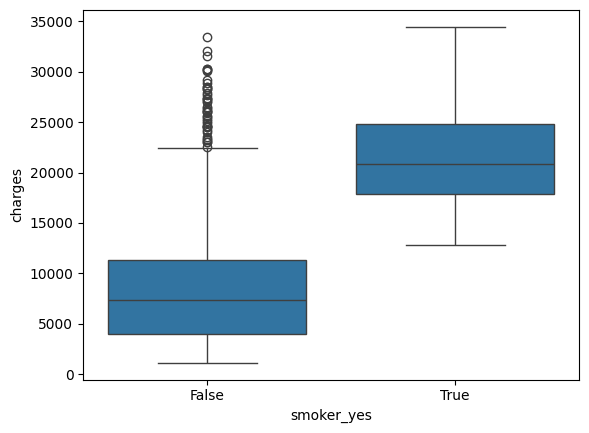

In [36]:
sns.boxplot(data=df, x='smoker_yes', y='charges')
plt.show()

In [39]:
df.groupby('smoker_yes')['charges'].mean()

smoker_yes
False     8363.186583
True     22014.245543
Name: charges, dtype: float64

In [43]:
df.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

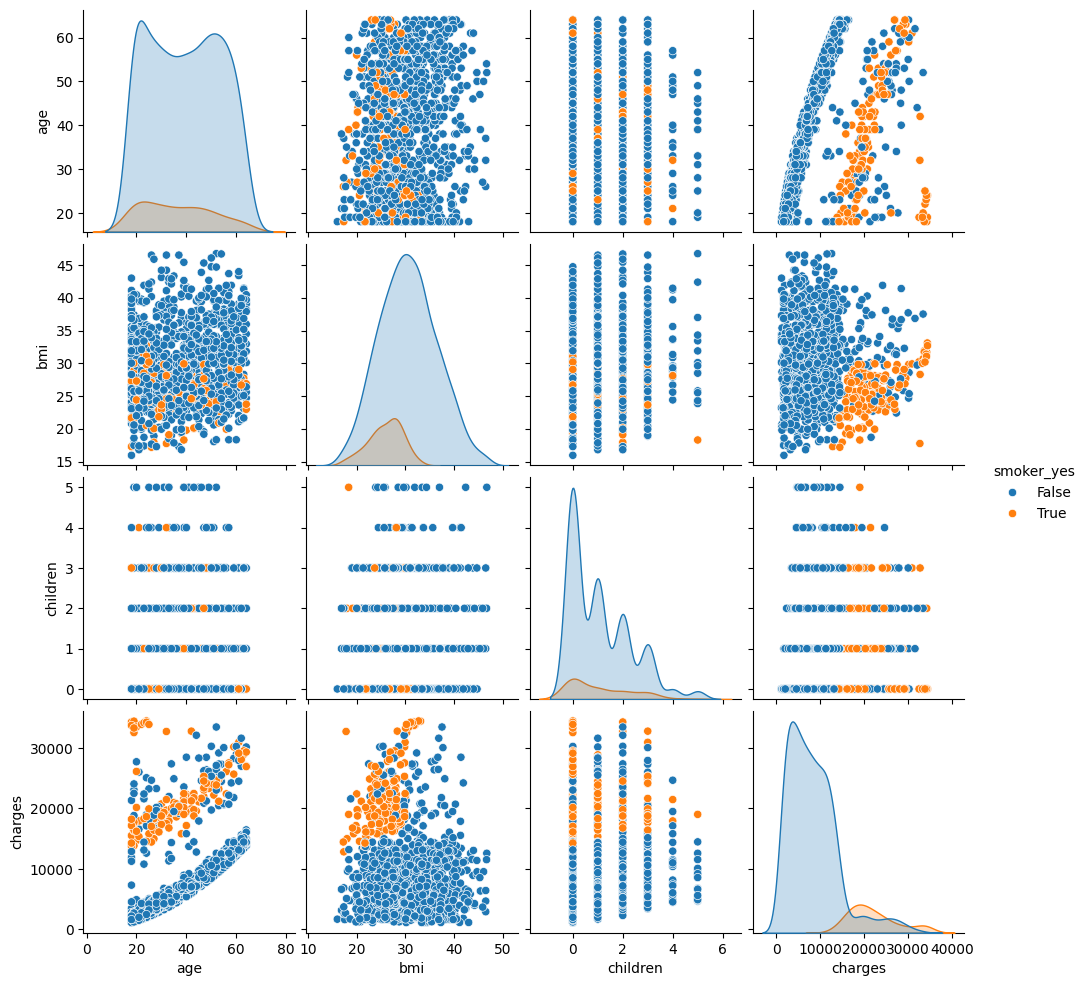

In [45]:
sns.pairplot(
    df[['age', 'bmi', 'children', 'charges', 'smoker_yes']], 
    hue='smoker_yes'
)
plt.show()